In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers , activations , models , preprocessing , utils
import tensorflow as tf
from  sklearn.model_selection import train_test_split

2023-02-20 11:02:43.998242: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
#doc du lieu ve dang data-label
data=[]
label=[]
error=0
with open('yelp_labelled.csv','r') as f:
    for line in f:
        part = line.strip().strip(',').split(',')
        if len(part)<=1:
            error+=1
            continue
        if part[-1]!='0' and part[-1]!='1':
            error+=1
            continue
        data.append(", ".join(part[:-1]))
        label.append(int(part[-1]))
print('Read',len(data),'items, skiped',error,'error lines')
print('Label 0:',len(label)-sum(label),'Label 1:',sum(label))

Read 992 items, skiped 8 error lines
Label 0: 496 Label 1: 496


In [ ]:
print(data[:5])
print(label[:5])

['Wow... Loved this place.', 'Crust is not good.', 'Not tasty and the texture was just nasty.', 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.', 'The selection on the menu was great and so were the prices.']
[1, 0, 0, 1, 1]


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(lower=True,split=' ')
tokenizer.fit_on_texts(data)
X = tokenizer.texts_to_sequences(data)
X = pad_sequences(X)
print(X[:5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0 424 164   8  15]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0 582   7  12  16]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  12 149   2   1 425   4  45 426]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 583
   73 289   1 584 290 893 894 180 895 896 427   2 164   9]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1 165  35   1 109   4  22   2  26  27   1 166]]


In [ ]:
print("input shape",X.shape)
n_vocab=len(tokenizer.word_index)+1
print('Vocab count',n_vocab)

input shape (992, 32)
Vocab count 2054


In [ ]:
print(n_vocab)
print(X.shape[1])

2054
32


In [ ]:
embed_dim = 128
hidden_size = 200
batch_size = 32

model = models.Sequential()
model.add(layers.Embedding(n_vocab, embed_dim, input_length = X.shape[1]))
#model.add(layers.LSTM(hidden_size,return_sequences = True))
model.add(layers.LSTM(hidden_size))
model.add(layers.Dense(128,activation='sigmoid'))
model.add(layers.Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

2023-02-20 11:03:25.816231: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 128)           262912    
                                                                 
 lstm (LSTM)                 (None, 200)               263200    
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 552,098
Trainable params: 552,098
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#tách train test
Y = tf.keras.utils.to_categorical(label)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 36)

In [ ]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = 10, verbose = 1, validation_split=0.1)

Epoch 1/10
21/21 [==============================] - 5s 99ms/step - loss: 0.7034 - accuracy: 0.4918 - val_loss: 0.6939 - val_accuracy: 0.4667
Epoch 2/10
21/21 [==============================] - 1s 55ms/step - loss: 0.6715 - accuracy: 0.6562 - val_loss: 0.6461 - val_accuracy: 0.6667
Epoch 3/10
21/21 [==============================] - 1s 69ms/step - loss: 0.4675 - accuracy: 0.8356 - val_loss: 0.5296 - val_accuracy: 0.7733
Epoch 4/10
21/21 [==============================] - 1s 66ms/step - loss: 0.1979 - accuracy: 0.9327 - val_loss: 0.4684 - val_accuracy: 0.8133
Epoch 5/10
21/21 [==============================] - 1s 61ms/step - loss: 0.0587 - accuracy: 0.9910 - val_loss: 0.5359 - val_accuracy: 0.8267
Epoch 6/10
21/21 [==============================] - 1s 59ms/step - loss: 0.0258 - accuracy: 0.9940 - val_loss: 0.6430 - val_accuracy: 0.8400
Epoch 7/10
21/21 [==============================] - 1s 62ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.7731 - val_accuracy: 0.8000
Epoch 8/10
21

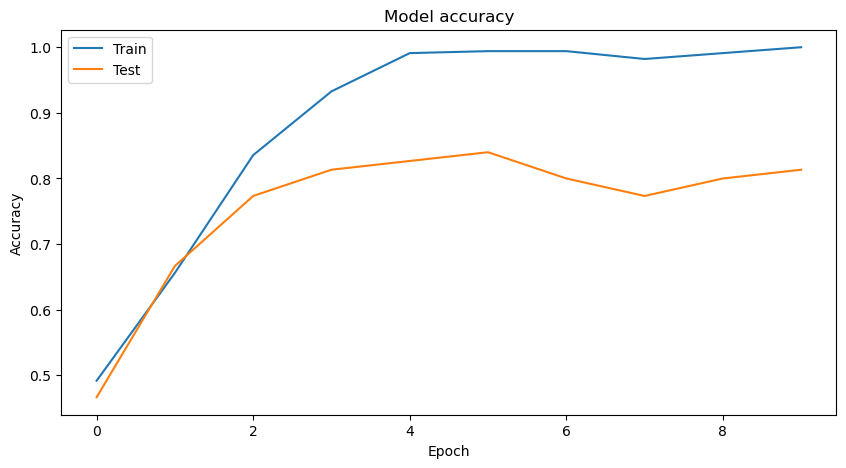

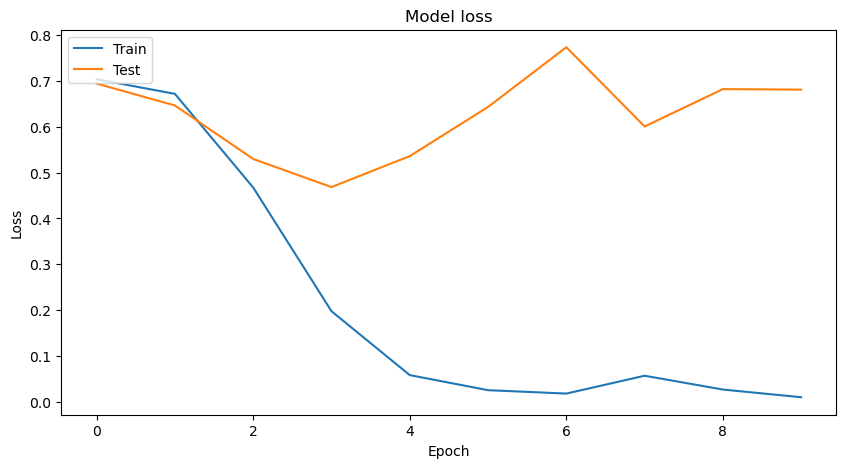

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#test
preds = model.predict(X_valid, verbose = 1)

8/8 [==============================] - 1s 22ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
#show result scores
predict_labels = preds.argmax(axis=-1)
true_labels=Y_valid.argmax(axis=-1)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(true_labels, predict_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(true_labels, predict_labels)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(true_labels, predict_labels)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(true_labels, predict_labels)
print('F1 score: %f' % f1)
predict_labels=np.append(predict_labels,1)
yhat4 = tf.keras.utils.to_categorical(predict_labels)
predict_labels=predict_labels[:-1]
yhat4=yhat4[:-1]
real = tf.keras.utils.to_categorical(true_labels)
print("\n".join(classification_report(real, yhat4).split('\n')[:4]))


Accuracy: 0.770161
Precision: 0.766129
Recall: 0.772358
F1 score: 0.769231
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       125
           1       0.77      0.77      0.77       123
